In [92]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [130]:
 # Initialize the control system
Error = ctrl.Antecedent(np.arange(-200, 201, 1), 'Error')
DerivativeError = ctrl.Antecedent(np.arange(-30, 30.1, 0.1), 'DerivativeError')
DeltaSpeed = ctrl.Consequent(np.arange(-2.0, 2.01, 0.01), 'DeltaSpeed')

In [102]:
Error['negative_large'] = fuzz.trimf(Error.universe, [-100, -100, -50])
Error['negative_small'] = fuzz.trimf(Error.universe, [-60, -25, 0])
Error['zero'] = fuzz.trimf(Error.universe, [-15, 0, 15])
Error['positive_small'] = fuzz.trimf(Error.universe, [0, 25, 60])
Error['positive_large'] = fuzz.trimf(Error.universe, [50, 100, 100])

DerivativeError['negative_large'] = fuzz.trimf(DerivativeError.universe, [-20, -20, -10])
DerivativeError['negative_small'] = fuzz.trimf(DerivativeError.universe, [-15, -5, 0])
DerivativeError['zero'] = fuzz.trimf(DerivativeError.universe, [-5, 0, 5])
DerivativeError['positive_small'] = fuzz.trimf(DerivativeError.universe, [0, 5, 15])
DerivativeError['positive_large'] = fuzz.trimf(DerivativeError.universe, [10, 20, 20])

DeltaSpeed['negative_large'] = fuzz.trimf(DeltaSpeed.universe, [-2.0, -2.0, -1.0])
DeltaSpeed['negative_small'] = fuzz.trimf(DeltaSpeed.universe, [-1.5, -0.5, 0])
DeltaSpeed['zero'] = fuzz.trimf(DeltaSpeed.universe, [-0.5, 0, 0.5])
DeltaSpeed['positive_small'] = fuzz.trimf(DeltaSpeed.universe, [0, 0.5, 1.5])
DeltaSpeed['positive_large'] = fuzz.trimf(DeltaSpeed.universe, [1.0, 2.0, 2.0])

In [111]:
Error['negative'] = fuzz.gaussmf(Error.universe, -50, 20)
Error['zero'] = fuzz.gaussmf(Error.universe, 0, 5)
Error['positive'] = fuzz.gaussmf(Error.universe, 50, 20)

DerivativeError['negative'] = fuzz.gaussmf(DerivativeError.universe, -10, 5)
DerivativeError['zero'] = fuzz.gaussmf(DerivativeError.universe, 0, 2.5)
DerivativeError['positive'] = fuzz.gaussmf(DerivativeError.universe, 10, 5)

DeltaSpeed['negative'] = fuzz.gaussmf(DeltaSpeed.universe, -1, 0.5)
DeltaSpeed['zero'] = fuzz.gaussmf(DeltaSpeed.universe, 0, 0.25)
DeltaSpeed['positive'] = fuzz.gaussmf(DeltaSpeed.universe, 1, 0.5)

In [128]:
Error['negative'] = fuzz.trimf(Error.universe, [-200, -100, -10])
Error['zero'] = fuzz.trimf(Error.universe, [-20, 0, 20])
Error['positive'] = fuzz.trimf(Error.universe, [10, 100, 200])

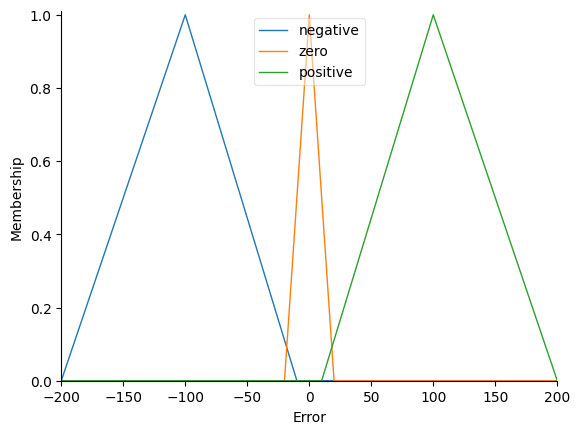

In [129]:
Error.view()

In [133]:
DerivativeError['negative'] = fuzz.trimf(DerivativeError.universe, [-30, -15, 0])
DerivativeError['zero'] = fuzz.trimf(DerivativeError.universe, [-6, 0, 6])
DerivativeError['positive'] = fuzz.trimf(DerivativeError.universe, [0, 15, 30])

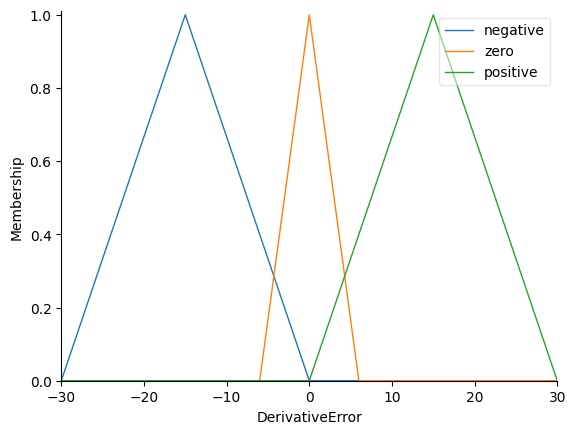

In [134]:
DerivativeError.view()

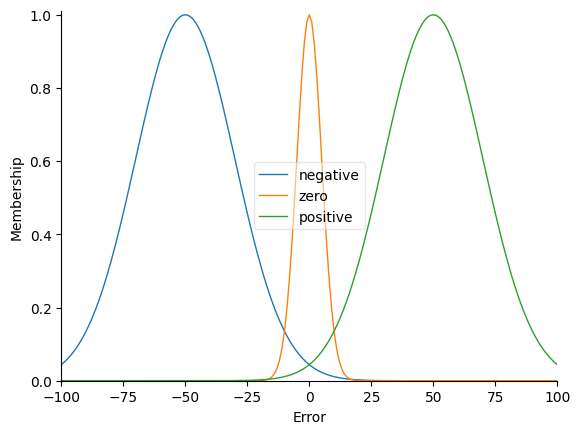

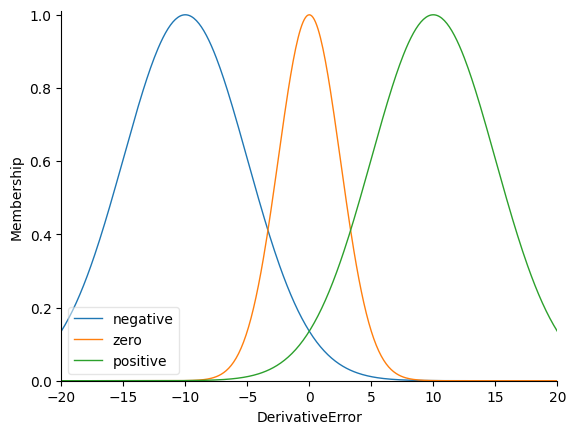

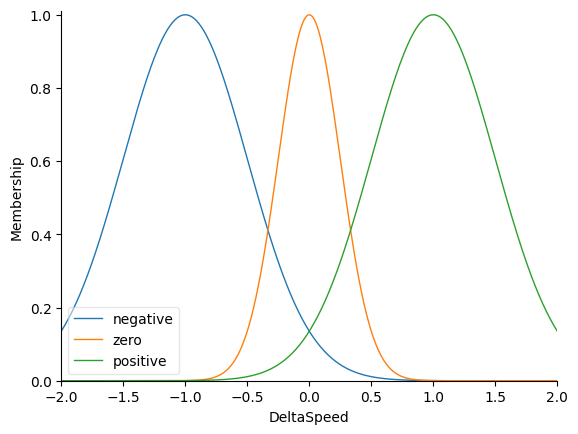

In [112]:
Error.view()
DerivativeError.view()
DeltaSpeed.view()

In [34]:
rules = [
    ctrl.Rule(Error['NB'] & DerivativeError['NB'], DeltaSpeed['KB']),
    ctrl.Rule(Error['NB'] & DerivativeError['NM'], DeltaSpeed['KB']),
    ctrl.Rule(Error['NB'] & DerivativeError['ZE'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NB'] & DerivativeError['PM'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NB'] & DerivativeError['PB'], DeltaSpeed['ST']),

    ctrl.Rule(Error['NM'] & DerivativeError['NB'], DeltaSpeed['KB']),
    ctrl.Rule(Error['NM'] & DerivativeError['NM'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NM'] & DerivativeError['ZE'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NM'] & DerivativeError['PM'], DeltaSpeed['ST']),
    ctrl.Rule(Error['NM'] & DerivativeError['PB'], DeltaSpeed['ST']),

    ctrl.Rule(Error['ZE'] & DerivativeError['NB'], DeltaSpeed['KS']),
    ctrl.Rule(Error['ZE'] & DerivativeError['NM'], DeltaSpeed['ST']),
    ctrl.Rule(Error['ZE'] & DerivativeError['ZE'], DeltaSpeed['ST']),
    ctrl.Rule(Error['ZE'] & DerivativeError['PM'], DeltaSpeed['TS']),
    ctrl.Rule(Error['ZE'] & DerivativeError['PB'], DeltaSpeed['TS']),

    ctrl.Rule(Error['PM'] & DerivativeError['NB'], DeltaSpeed['ST']),
    ctrl.Rule(Error['PM'] & DerivativeError['NM'], DeltaSpeed['ST']),
    ctrl.Rule(Error['PM'] & DerivativeError['ZE'], DeltaSpeed['TS']),
    ctrl.Rule(Error['PM'] & DerivativeError['PM'], DeltaSpeed['TS']),
    ctrl.Rule(Error['PM'] & DerivativeError['PB'], DeltaSpeed['TB']),

    ctrl.Rule(Error['PB'] & DerivativeError['NB'], DeltaSpeed['ST']),
    ctrl.Rule(Error['PB'] & DerivativeError['NM'], DeltaSpeed['TS']),
    ctrl.Rule(Error['PB'] & DerivativeError['ZE'], DeltaSpeed['TB']),
    ctrl.Rule(Error['PB'] & DerivativeError['PM'], DeltaSpeed['TB']),
    ctrl.Rule(Error['PB'] & DerivativeError['PB'], DeltaSpeed['TB'])
]

In [35]:
rules

[IF Error[NB] AND DerivativeError[NB] THEN DeltaSpeed[KB]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NB] AND DerivativeError[NM] THEN DeltaSpeed[KB]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NB] AND DerivativeError[ZE] THEN DeltaSpeed[KS]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NB] AND DerivativeError[PM] THEN DeltaSpeed[KS]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NB] AND DerivativeError[PB] THEN DeltaSpeed[ST]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NM] AND DerivativeError[NB] THEN DeltaSpeed[KB]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NM] AND DerivativeError[NM] THEN DeltaSpeed[KS]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF Error[NM] AND DerivativeError[ZE] THEN DeltaSpeed[KS]
 	AND aggregation function : fmin
 	OR aggregation fu

In [36]:
DeltaSpeedControl = ctrl.ControlSystem(rules)
DeltaSpeedSim = ctrl.ControlSystemSimulation(DeltaSpeedControl)

In [37]:
# Test dengan nilai masukan
DeltaSpeedSim.input['Error'] = 0.5
DeltaSpeedSim.input['DerivativeError'] = -0.5
DeltaSpeedSim.compute()

Output Delta Speed: 0.07091346153846184


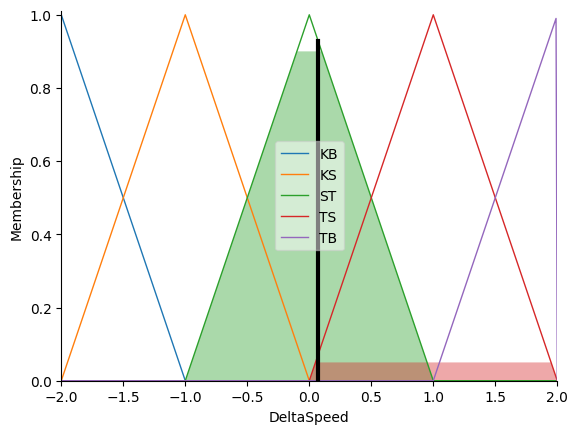

In [38]:
print(f"Output Delta Speed: {DeltaSpeedSim.output['DeltaSpeed']}")
DeltaSpeed.view(sim=DeltaSpeedSim)